In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.columns = df.columns.str.strip()

In [6]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Fill missing values
df['no_of_dependents'].fillna(df['no_of_dependents'].median(), inplace=True)
df['income_annum'].fillna(df['income_annum'].median(), inplace=True)
df['loan_amount'].fillna(df['loan_amount'].median(), inplace=True)
df['loan_term'].fillna(df['loan_term'].median(), inplace=True)
df['cibil_score'].fillna(df['cibil_score'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None

Missing values per colum

C:\Users\COMPUMARTS\AppData\Local\Temp\ipykernel_27408\1864335913.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_dependents'].fillna(df['no_of_dependents'].median(), inplace=True)
C:\Users\COMPUMARTS\AppData\Local\Temp\ipykernel_27408\1864335913.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [7]:
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])  # Target column

In [8]:
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🔹 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

🔹 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       531
           1       0.73      0.72      0.72       323

    accuracy                           0.79       854
   macro avg       0.78      0.78      0.78       854
weighted avg       0.79      0.79      0.79       854



In [12]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("🔹 Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))

🔹 Decision Tree Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



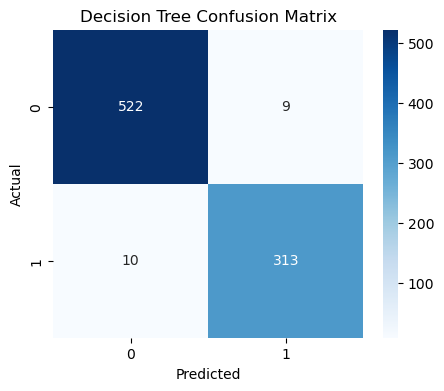

In [13]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()